<a href="https://colab.research.google.com/github/tanriders/PM2.5-Forecasting-In-Bangkok/blob/main/Air4thai_PM2_5_Forecasting_In_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**PM2.5 Forecasting In Bangkok (Air4thai)**

---



ปัจจุบัน มีหลายหน่วยงานที่ได้มีจุดตรวจวัดค่า PM 2.5 จริง ในประเทศไทยและได้มีการเผยแพร่ข้อมูลสาธารณะ เช่น

* กรมควบคุมผลพิษ:

เป็นข้อมูลเฉลี่ย 24 ชั่วโมง Particulate Air Pollution (PM2.5) ย้อนหลังหลายปี และมีการเก็บจากหลายจุดตรวจวัดทั่วประเทศ:
https://air4thai.pcd.go.th/webV2/history/

ให้นักศึกษาใช้ข้อมูลจากกรมควบคุมมลพิษเพื่อสร้างโมเดลทำนายค่า PM 2.5 ในปี 2024

#**Import Library**

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense



#**Import PM2.5 Data (Air4thai)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_PM25_2020 = pd.read_excel("/content/drive/MyDrive/DS/DS-Social Goods and Environment/Air4Thai_pm25_2011_2023/PM2.5/PM2.5(2020).xlsx", sheet_name=0)
df_PM25_2020


,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,75T,76T,77T,78T,79T,80T,Unnamed: 87,Unnamed: 88,Unnamed: 89,84T
0,2020-01-01 00:00:00,20,22.000000,18.000000,23.000000,17.000000,20.000000,20.000000,21.00000,22.000000,...,17.0,35.0,15.0,10.0,38.0,7.0,NaN,NaN,NaN,NaN
1,2020-01-02 00:00:00,26,24.000000,20.000000,26.000000,21.000000,24.000000,26.000000,28.00000,27.000000,...,14.0,32.0,22.0,9.0,29.0,8.0,NaN,NaN,NaN,NaN
2,2020-01-03 00:00:00,32,28.000000,24.000000,31.000000,24.000000,27.000000,32.000000,32.00000,29.000000,...,10.0,33.0,25.0,8.0,43.0,8.0,NaN,NaN,NaN,NaN
3,2020-01-04 00:00:00,37,35.000000,31.000000,35.000000,35.000000,34.000000,37.000000,38.00000,39.000000,...,15.0,33.0,28.0,8.0,51.0,9.0,NaN,NaN,NaN,NaN
4,2020-01-05 00:00:00,45,41.000000,33.000000,40.000000,36.000000,38.000000,42.000000,51.00000,44.000000,...,19.0,40.0,39.0,8.0,56.0,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2020-12-29 00:00:00,36,24.000000,28.000000,29.000000,27.000000,25.000000,29.000000,45.00000,31.000000,...,17.0,33.0,37.0,6.0,26.0,13.0,NaN,NaN,NaN,18.0
366,2020-12-30 00:00:00,36,21.000000,30.000000,27.000000,27.000000,25.000000,27.000000,30.00000,29.000000,...,18.0,36.0,28.0,7.0,32.0,16.0,NaN,NaN,NaN,22.0
367,2020-12-31 00:00:00,23,17.000000,22.000000,20.000000,19.000000,17.000000,22.000000,20.00000,21.000000,...,NaN,25.0,22.0,11.0,19.0,14.0,NaN,NaN,NaN,15.0
368,NaN,30.566667,22.467391,22.420455,23.913043,26.336957,21.184783,20.482353,35.73913,28.466667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_PM25_2021 = pd.read_excel("/content/drive/MyDrive/DS/DS-Social Goods and Environment/Air4Thai_pm25_2011_2023/PM2.5/PM2.5(2021).xlsx", sheet_name=0)
df_PM25_2021

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,92T,42T,43T,44T,62T,63T,78T,80T,89T,93T
0,2021-01-01,27.0,20,22.0,25,22.0,20,25.0,24.0,25.0,...,NaN,19.0,23.0,20,18,17,7.0,18.0,17.0,NaN
1,2021-01-02,32.0,25,26.0,27,27.0,23,26.0,29.0,31.0,...,NaN,19.0,24.0,16,15,19,8.0,13.0,17.0,NaN
2,2021-01-03,46.0,37,33.0,41,40.0,38,29.0,44.0,44.0,...,NaN,22.0,27.0,15,15,18,6.0,12.0,15.0,NaN
3,2021-01-04,39.0,31,32.0,36,38.0,36,28.0,46.0,41.0,...,NaN,23.0,27.0,12,12,12,3.0,9.0,17.0,NaN
4,2021-01-05,50.0,31,31.0,32,44.0,28,24.0,67.0,41.0,...,NaN,19.0,27.0,14,8,13,3.0,11.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,36.0,29,23.0,23,27.0,23,24.0,41.0,33.0,...,26.0,17.0,15.0,18,20,20,11.0,9.0,23.0,12.0
361,2021-12-28,19.0,17,15.0,11,17.0,11,17.0,22.0,19.0,...,22.0,15.0,15.0,17,20,21,9.0,9.0,16.0,12.0
362,2021-12-29,19.0,19,13.0,15,16.0,14,18.0,19.0,20.0,...,23.0,10.0,12.0,10,16,15,10.0,7.0,15.0,8.0
363,2021-12-30,23.0,23,18.0,18,18.0,15,19.0,24.0,22.0,...,22.0,9.0,9.0,13,15,13,8.0,7.0,10.0,11.0


In [ ]:
df_PM25_2022 = pd.read_excel("/content/drive/MyDrive/DS/DS-Social Goods and Environment/Air4Thai_pm25_2011_2023/PM2.5/PM2.5(2022).xlsx", sheet_name=0)
df_PM25_2022

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,98T,42T,43T,44T,62T,63T,78T,80T,89T,93T
0,2022-01-01 00:00:00,23.0,21.0,17.0,20.0,20.0,16.0,19.0,23.0,24.0,...,NaN,13.0,15.0,17.0,18.0,17.0,9.0,8.0,15.0,13.0
1,2022-01-02 00:00:00,24.0,24.0,20.0,19.0,20.0,17.0,21.0,24.0,24.0,...,NaN,13.0,15.0,16.0,20.0,20.0,10.0,10.0,11.0,13.0
2,2022-01-03 00:00:00,27.0,27.0,22.0,23.0,22.0,21.0,24.0,31.0,27.0,...,NaN,14.0,14.0,14.0,17.0,18.0,10.0,9.0,14.0,11.0
3,2022-01-04 00:00:00,34.0,33.0,29.0,29.0,29.0,27.0,27.0,37.0,35.0,...,NaN,14.0,13.0,15.0,18.0,19.0,10.0,9.0,11.0,10.0
4,2022-01-05 00:00:00,43.0,43.0,29.0,25.0,33.0,31.0,31.0,45.0,43.0,...,NaN,19.0,17.0,13.0,15.0,16.0,11.0,8.0,12.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2022-12-29 00:00:00,43.0,38.0,33.0,35.0,31.0,26.0,29.0,50.0,43.0,...,36.0,25.0,19.0,26.0,NaN,NaN,11.0,26.0,19.0,11.0
363,2022-12-30 00:00:00,27.0,24.0,22.0,25.0,23.0,19.0,20.0,27.0,28.0,...,28.0,27.0,23.0,27.0,NaN,NaN,12.0,29.0,24.0,16.0
364,2022-12-31 00:00:00,29.0,24.0,23.0,27.0,26.0,18.0,22.0,34.0,31.0,...,27.0,30.0,22.0,24.0,NaN,NaN,11.0,27.0,22.0,15.0
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_PM25_2023 = pd.read_excel("/content/drive/MyDrive/DS/DS-Social Goods and Environment/Air4Thai_pm25_2011_2023/PM2.5/PM2.5(2023).xlsx", sheet_name=0)
df_PM25_2023

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,98T,42T,43T,44T,62T,63T,78T,80T,89T,93T
0,2023-01-01 00:00:00,30,29.0,28.0,26.0,23.0,22.0,24.0,31.0,NaN,...,28.0,28.0,20.0,28.0,NaN,NaN,10.0,24.0,18.0,12.0
1,2023-01-02 00:00:00,33,33.0,28.0,33.0,29.0,22.0,27.0,35.0,NaN,...,31.0,23.0,20.0,21.0,NaN,NaN,10.0,25.0,16.0,10.0
2,2023-01-03 00:00:00,33,32.0,25.0,27.0,26.0,21.0,24.0,33.0,NaN,...,29.0,17.0,17.0,17.0,NaN,NaN,9.0,18.0,19.0,11.0
3,2023-01-04 00:00:00,25,24.0,19.0,20.0,22.0,15.0,20.0,26.0,NaN,...,30.0,16.0,19.0,14.0,NaN,NaN,11.0,17.0,20.0,9.0
4,2023-01-05 00:00:00,28,24.0,22.0,23.0,21.0,16.0,19.0,30.0,NaN,...,25.0,16.0,21.0,20.0,NaN,NaN,9.0,20.0,17.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,หมายเหตุ : N/A ไม่มีข้อมูล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,ค่ามาตรฐาน PM2.5 เฉลี่ย 24 ชั่วโมง 50 มคก./ลบ....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Station = pd.read_excel("/content/drive/MyDrive/DS/DS-Social Goods and Environment/Air4Thai_pm25_2011_2023/PM2.5/PM2.5(2020).xlsx", sheet_name=1)
df_Station.head(20)

,รายละเอียดสถานีตรวจวัดคุณภาพอากาศ,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี
2,NaN,NaN,NaN
3,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา
4,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา
5,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น
6,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง
7,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา
8,59T,แขวงพญาไท เขตพญาไท กทม.,กรมประชาสัมพันธ์
9,61T,แขวงพลับพลา เขตวังทองหลาง กทม.,โรงเรียนบดินทรเดชา (สิงห์ สิงหเสนี)


In [ ]:
# ผนวก DataFrames ด้วย pd.concat()
df_PM25 = pd.concat([df_PM25_2020, df_PM25_2021,df_PM25_2022,df_PM25_2023])

In [ ]:
# สร้าง DataFrame ใหม่จากคอลัมน์ 'Date' และ '11T' (แขวงดินแดง เขตดินแดง กทม.	สนามกีฬาเคหะชุมชนห้วยขวาง)
df = pd.DataFrame({
    'Date': df_PM25['Date'],
    'PM2.5': df_PM25['11T']
})

df

,Date,PM2.5
0,2020-01-01 00:00:00,23.0
1,2020-01-02 00:00:00,26.0
2,2020-01-03 00:00:00,31.0
3,2020-01-04 00:00:00,35.0
4,2020-01-05 00:00:00,40.0
...,...,...
181,NaN,NaN
182,NaN,NaN
183,หมายเหตุ : N/A ไม่มีข้อมูล,NaN
184,NaN,NaN


#**Exploratory Data Analysis**

In [ ]:
df.shape

(1288, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1280 non-null   object 
 1   PM2.5   1276 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,PM2.5
count,1276.000000
mean,21.980207
std,12.981831
min,4.000000
25%,12.000000
50%,18.000000
75%,28.000000
max,79.000000


In [ ]:
# ลบค่าที่ขาดหายไปใน DataFrame
df = df.dropna()

In [ ]:
#Check missing data
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Date,0,0.0
PM2.5,0,0.0


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM2.5,1273.0,21.98,12.99,4.0,12.0,18.0,28.0,79.0


In [ ]:
# แปลงคอลัมน์ 'Date' เป็นรูปแบบ datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

<ipython-input-455-d3dcfa2c840d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,PM2.5
Date,
2020-01-01,23.0
2020-01-02,26.0
2020-01-03,31.0
2020-01-04,35.0
2020-01-05,40.0
...,...
2023-06-26,8.8
2023-06-27,12.5
2023-06-28,14.5


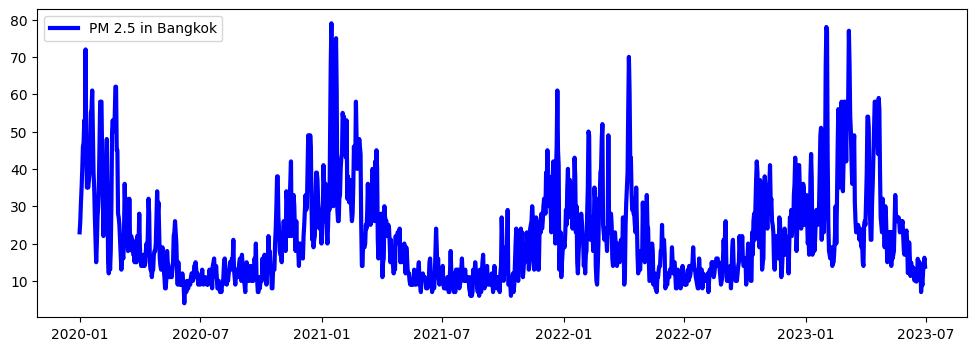

In [ ]:
#มลพิษ ประเทศไทย ค่า PM 2.5 ไม่ควรเกิน 50 ไมโครกรัมต่อลูกบาศก์เมตรใน 24 ชั่วโมง

plt.figure(figsize=(12, 4))
plt.plot(df, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

#**Training model**

การแบ่งข้อมูลใช้ในการ train และ test

In [ ]:
n_train = int(df.shape[0] * 0.80)
n_train

1018

In [ ]:
df

,PM2.5
Date,
2020-01-01,23.0
2020-01-02,26.0
2020-01-03,31.0
2020-01-04,35.0
2020-01-05,40.0
...,...
2023-06-26,8.8
2023-06-27,12.5
2023-06-28,14.5


การแปลงข้อมูลให้เป็น Normalize คือแปลงข้อมูลให้เป็นเลข 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:5]

array([[0.25333333],
       [0.29333333],
       [0.36      ],
       [0.41333333],
       [0.48      ]])

สร้างฟังก์ชันเพื่อเตรียมข้อมูลให้เป็น matrix ใช้ step = 2

In [ ]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

การแบ่งข้อมูลเพื่อใช้ในการ train และ test

In [ ]:
train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape

((1018, 1), (255, 1))

In [ ]:
step = 2

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('Train Test (after conversion):', X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Train Test (after conversion): (1016, 2, 1) (253, 2, 1)
(1016, 1) (253, 1)


#**Model**

การสร้างโมเดล LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 32)                4352      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


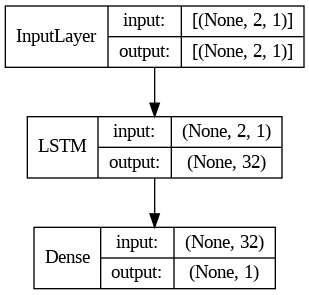

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'my_lstm.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
32/32 [==============================] - 2s 3ms/step - loss: 0.0515
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0077


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

8/8 [==============================] - 0s 3ms/step - loss: 0.0141
0.01413482055068016


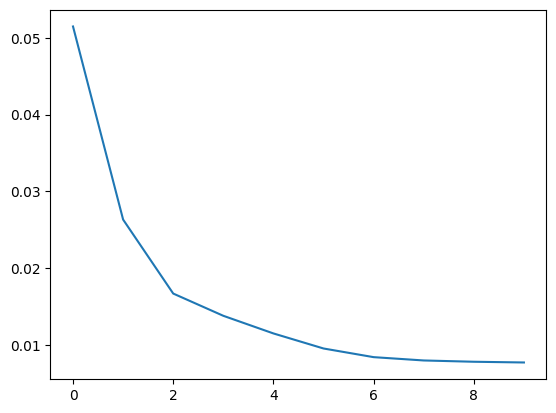

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend
plt.show()

In [ ]:
trainPredict = model.predict(X_train)
trainPredict

32/32 [==============================] - 0s 2ms/step


array([[0.26150823],
       [0.30674756],
       [0.36048245],
       ...,
       [0.29050794],
       [0.26523763],
       [0.27068782]], dtype=float32)

In [ ]:
testPredict = model.predict(X_test)
testPredict


8/8 [==============================] - 0s 2ms/step


array([[0.45071173],
       [0.36111668],
       [0.2959073 ],
       [0.26067904],
       [0.2959636 ],
       [0.39405113],
       [0.34082982],
       [0.22301795],
       [0.14684333],
       [0.16307913],
       [0.24598631],
       [0.37729663],
       [0.40610188],
       [0.33615488],
       [0.29050794],
       [0.28129804],
       [0.29977828],
       [0.366951  ],
       [0.39220357],
       [0.4274564 ],
       [0.3993129 ],
       [0.34379366],
       [0.31708878],
       [0.27439308],
       [0.2576657 ],
       [0.20393614],
       [0.14805238],
       [0.15683228],
       [0.20506248],
       [0.21359175],
       [0.21088234],
       [0.20841739],
       [0.17442898],
       [0.22508541],
       [0.2858922 ],
       [0.23727581],
       [0.15490201],
       [0.12591825],
       [0.15683228],
       [0.17950034],
       [0.20506248],
       [0.24492705],
       [0.2201692 ],
       [0.20506248],
       [0.2239818 ],
       [0.20706247],
       [0.20124346],
       [0.165

In [ ]:
test = np.argmax(testPredict, axis=1)

test2 = np.argmax(y_test, axis=1)

#**Evaluation Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

trainPredict_inv = sc.inverse_transform(trainPredict)
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, trainPredict_inv)
r2_test = r2_score(y_test_inv, testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2_Train: {:.3f}'.format(r2_train))
print('R2_Test: {:.3f}'.format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2_Train: 0.715
R2_Test: 0.578
RMSE Train: 6.546
RMSE Test: 8.917


* R-Square: เป็นค่าที่บอกว่าผลลัพธ์ที่ได้จาก Model เทียบกับค่าจริงแล้ว มีแนวโน้มไปใน ทิศทางเดียวกันมากน้อยเพียงใด โดยค่า R-Square มีค่าระหว่าง -1 ถึง 1 โดยยิ่งมีค่าเข้าใกล้ 1 นั่นหมายความว่าผลที่ได้จากการทำนาย และค่าจริงมีทิศทางไปในทางเดียวกัน

* Root Mean Square Error: เป็นการวัด Error โดยการเทียบค่าที่ได้จากการทำนาย กับค่าที่เกิดขึ้นจริง โดยค่า Error

In [ ]:
prefix = np.empty(step).reshape(-1, 1)

trainPredict_inv = np.concatenate((prefix, trainPredict_inv), axis=0)
testPredict_inv = np.concatenate((prefix, testPredict_inv), axis=0)

predict_inv = np.concatenate((trainPredict_inv, testPredict_inv), axis=0)

In [ ]:
predict_inv

array([[1.24998608e-321],
       [1.24998608e-321],
       [2.36131172e+001],
       ...,
       [1.23695421e+001],
       [1.46178484e+001],
       [1.60946484e+001]])

In [ ]:
pred_inv = sc.inverse_transform(predict_inv)
pred_inv

array([[   4.        ],
       [   4.        ],
       [1774.98379135],
       ...,
       [ 931.71565914],
       [1100.33862972],
       [1211.09862709]])

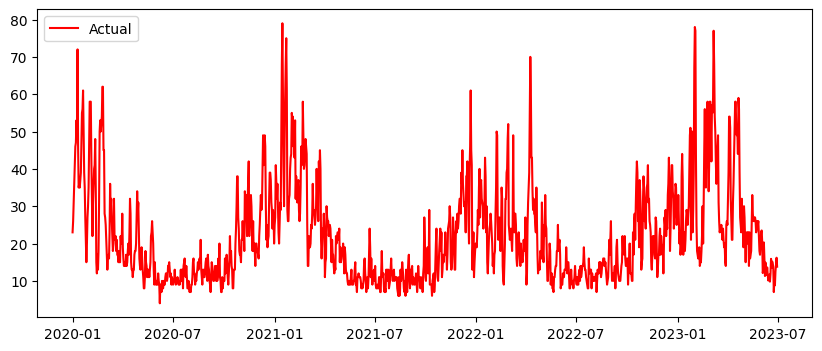

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df, 'r', label='Actual')
plt.legend()
plt.show()

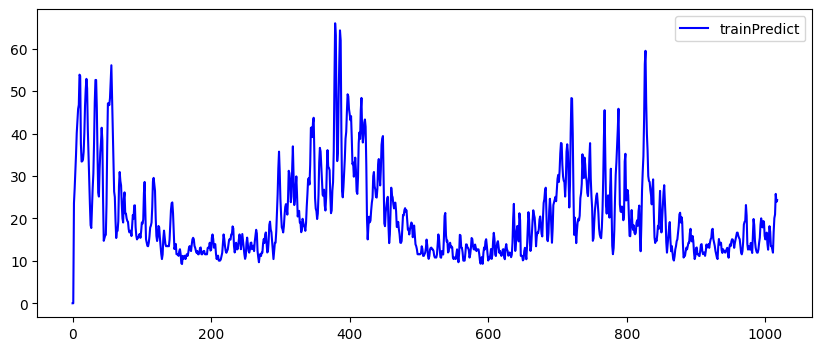

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(trainPredict_inv, 'b', label='trainPredict')
plt.legend()
plt.show()

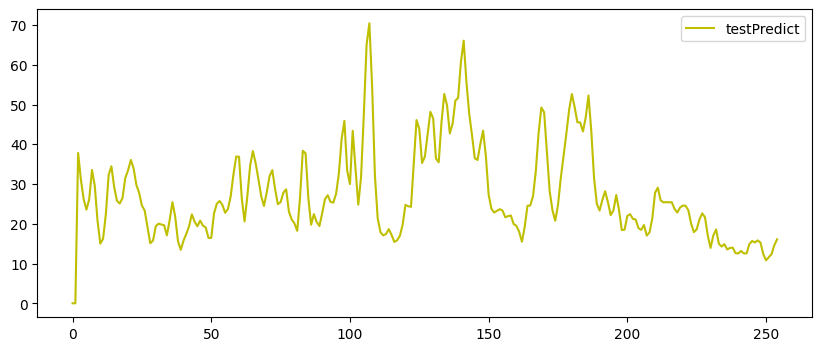

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(testPredict_inv, 'y', label='testPredict')
plt.legend()
plt.show()

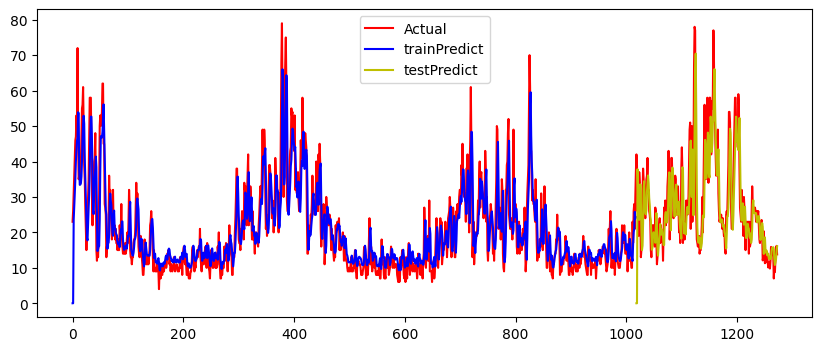

In [ ]:
plt.figure(figsize=(10, 4))
# สร้างลำดับของค่าในแกน x ตามความยาวของ trainPredict และ testPredict
x_train = range(len(trainPredict_inv))
x_test = range(len(trainPredict_inv), len(trainPredict_inv) + len(testPredict_inv))


plt.plot(df.values, 'r', label='Actual')
# พล็อตกราฟ trainPredict และ testPredict ในแกน x ต่อกัน
plt.plot(x_train, trainPredict_inv, 'b', label='trainPredict')
plt.plot(x_test, testPredict_inv, 'y', label='testPredict')

plt.legend()
plt.show()

In [ ]:
# เปลี่ยนรูปแบบของ array เป็น 1 มิติ
predict_inv_reshaped = predict_inv.reshape(-1)

# สร้าง DataFrame จาก array
df_predict_inv = pd.DataFrame({'predict_inv': predict_inv_reshaped.round(0),})

df_predict_inv

,predict_inv
0,0.0
1,0.0
2,24.0
3,27.0
4,31.0
...,...
1268,11.0
1269,12.0
1270,12.0
1271,15.0


In [ ]:
df_predict_inv = pd.DataFrame({'Predict': predict_inv_reshaped.round(0)}, index=df.index)
# เพิ่ม df_predict_inv เข้าไปใน df โดยใช้ join()
df = df.join(df_predict_inv)

In [ ]:
df.tail(24)

,PM2.5,Predict
Date,,
2023-06-07,16.2,17.0
2023-06-08,11.3,19.0
2023-06-09,14.9,15.0
2023-06-10,12.5,14.0
2023-06-11,11.6,15.0
2023-06-12,13.6,14.0
2023-06-13,11.6,14.0
2023-06-14,10.1,14.0
2023-06-15,11.5,13.0


In [ ]:
# ทำนายข้อมูลในอนาคต 366 วันข้างหน้า
n_ahead = 366 # 2023-06-30 ถึง 2024-06-30
yhat = model.predict(X_train[:n_ahead]) # ทำนายข้อมูลในอนาคต
yhat

12/12 [==============================] - 0s 2ms/step


array([[0.26150823],
       [0.30674756],
       [0.36048245],
       [0.41501373],
       [0.48144045],
       [0.5195784 ],
       [0.55763674],
       [0.5703336 ],
       [0.6653385 ],
       [0.6613406 ],
       [0.44804513],
       [0.39220357],
       [0.39312458],
       [0.39788517],
       [0.42265362],
       [0.48207486],
       [0.5680728 ],
       [0.6198748 ],
       [0.65211666],
       [0.62210584],
       [0.49282658],
       [0.41220537],
       [0.34169704],
       [0.2591491 ],
       [0.19230986],
       [0.18330577],
       [0.24877463],
       [0.307536  ],
       [0.35404354],
       [0.4496128 ],
       [0.57686245],
       [0.6486337 ],
       [0.6486337 ],
       [0.5608418 ],
       [0.41513783],
       [0.2952895 ],
       [0.28211263],
       [0.36607322],
       [0.4216995 ],
       [0.4520518 ],
       [0.49848574],
       [0.4584766 ],
       [0.27610958],
       [0.1430707 ],
       [0.15122865],
       [0.15929684],
       [0.1618472 ],
       [0.257

In [ ]:
yhat.shape

(366, 1)

In [ ]:
yhat_reshaped = sc.inverse_transform(yhat)


# สร้าง index ให้กับช่วงเวลาที่ต้องการทำนาย 2023-06-30
date_rng = pd.date_range(start='2023-06-30', end='2024-06-30')

# แปลง numpy array เป็น DataFrame
yhat_df = pd.DataFrame(yhat_reshaped, columns=['Prediction'], index=date_rng[:len(yhat)])

yhat_df

,Prediction
2023-06-30,23.613117
2023-07-01,27.006067
2023-07-02,31.036184
2023-07-03,35.126030
2023-07-04,40.108032
...,...
2024-06-25,26.778435
2024-06-26,23.038149
2024-06-27,21.869795
2024-06-28,24.924664


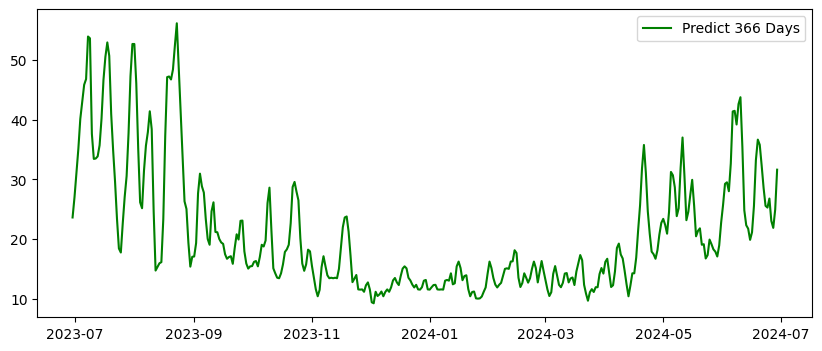

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(yhat_df, 'g', label='Predict 366 Days')
plt.legend()
plt.show()